transactions.csv 
Набор данных с самими транзакциями клиентов. Это самые актуальные данные, необходимые для решения задачи, приблизительно 350 тысяч транзакций. 
Как и все данные в этом соревновании, эти данные являются синтетическими, полученными путем модельной генерации последовательностей, модели для которых были обучены на основе реальных банковских датасетов. Дополнительная информация о процессе генерации доступна в разделе FAQ, а также будет изложена во время награждения в рамках Data Halloween.  
Структура данных: каждой транзакции соответствует строка в таблице, в которой содержится следующая информация: 

clnt_id — идентификатор клиента, по которому можно найти дополнительную информацию в других таблицах;
date — относительная дата, в которую была совершена транзакция;
mcc_id — идентификатор типа транзакции (Merchant Category Code). Предоставленные в рамках соревнования данные являются синтетическими, однако в реальных приложениях данный код определяет тип транзакции. 
Примеры кодов в реальных приложениях: “оплата в кафе и ресторанах”, “начисление зарплаты”, “снятие наличных в банкомате” и другие. Как правило, в банковских системах используются более 10 000 различных кодов, но в рамках предложенных данных мы сгенерировали только 50.
sum — сумма транзакции. Может быть как положительной (начисление на счет), так и отрицательной. Подробнее о структуре сумм внутри различных кодов транзакций можно узнать, начав анализировать данные :)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('transactions.csv')
df

,clnt_id,date,mcc_id,sum
0,2013,1211,44,1000.0
1,2019,1211,5,-176.0
2,2019,1211,5,-105.0
3,2019,1211,33,-2000.0
4,2019,1211,33,-230.0
...,...,...,...,...
350412,4987,1449,43,-5000.0
350413,4988,1449,5,-409.0
350414,4989,1449,5,-299.0
350415,4994,1449,12,-1200.0


In [4]:
len(df.clnt_id.unique())

2899

In [5]:
len(df.date.unique())

239

In [6]:
len(df.mcc_id.unique())

50

In [19]:
prem=pd.read_csv('is_prem.csv')
pr1=prem.query('is_premium ==1')
pr0=prem.query('is_premium ==0')

In [22]:
prem_1=df.query('clnt_id in @pr1.clnt_id')
prem_0=df.query('clnt_id in @pr0.clnt_id')

In [23]:
prem_1

,clnt_id,date,mcc_id,sum
0,2013,1211,44,1000.0
1,2019,1211,5,-176.0
2,2019,1211,5,-105.0
3,2019,1211,33,-2000.0
4,2019,1211,33,-230.0
...,...,...,...,...
350402,4972,1449,6,1000.0
350403,4972,1449,26,-1000.0
350405,4976,1449,38,-1000.0
350406,4976,1449,43,-2380.0


In [24]:
prem_0

,clnt_id,date,mcc_id,sum
10,2023,1211,22,-700.0
14,2032,1211,5,-678.0
15,2032,1211,5,-570.0
16,2032,1211,5,-114.0
17,2032,1211,5,-340.0
...,...,...,...,...
350408,4981,1449,22,-50.0
350409,4981,1449,22,-50.0
350410,4981,1449,33,-16277.0
350413,4988,1449,5,-409.0


In [30]:
g_p1_s=prem_1[['clnt_id','sum']].groupby('clnt_id').sum()
g_p1_s

,sum
clnt_id,
2001,-44984.0
2006,-255692.0
2012,-7793.0
2013,-47305.0
2014,-189942.0
...,...
4983,-199664.0
4989,-1250458.0
4997,-53698.0


In [31]:
g_p0_s=prem_0[['clnt_id','sum']].groupby('clnt_id').sum()
g_p0_s

,sum
clnt_id,
2002,-232831.0
2003,-328355.0
2005,-132126.0
2009,-257810.0
2015,-196269.0
...,...
4990,-18341.0
4992,-249034.0
4993,-153078.0


In [36]:
np.mean(g_p1_s['sum']),np.median(g_p1_s['sum'])

(-270259.58410596027, -180697.0)

In [37]:
np.mean(g_p0_s['sum']),np.median(g_p0_s['sum'])

(-153221.09681372548, -111111.0)

Среднее и медиана отличаются сильно в расходах

In [68]:
pp1=prem_1.query('sum>0')
g_pp1_s=pp1[['clnt_id','sum']].groupby('clnt_id').sum()
g_pp1_s

,sum
clnt_id,
2001,130887.0
2006,285839.0
2012,200873.0
2013,451649.0
2014,99943.0
...,...
4982,219923.0
4989,188748.0
4997,586158.0


In [84]:
pp0=prem_0.query('sum>0')
g_pp0_s=pp0[['clnt_id','sum']].groupby('clnt_id').sum()
g_pp0_s

,sum
clnt_id,
2002,233525.0
2003,5748.0
2005,32349.0
2009,198132.0
2015,27278.0
...,...
4988,167667.0
4990,8800.0
4992,16830.0


In [85]:
np.mean(g_pp0_s['sum']),np.median(g_pp0_s['sum'])

(147112.80842911877, 78324.0)

In [86]:
np.mean(g_pp1_s['sum']),np.median(g_pp1_s['sum'])

(334960.76974564925, 130165.0)

Количество строчек меньше, чем в предыдущем, то есть кто-то не получал денег на счет

In [87]:
g_pp1_s_index=g_pp1_s.index
g_p1_s_index=g_p1_s.index
g_pp0_s_index=g_pp0_s.index
g_p0_s_index=g_p0_s.index
len(g_pp1_s_index),len(g_p1_s_index),len(g_pp0_s_index),len(g_p0_s_index)

(747, 755, 783, 816)

In [61]:
w=[]
q=[]
for i in g_p1_s_index:
    for j in g_pp1_s_index:
        if i == j:
            w.append(i)
    if i not in set(w):
        q.append(i)

In [62]:
q=pd.DataFrame(data=q)
q

,0
0,3022
1,3232
2,3396
3,3460
4,3837
5,3882
6,4513
7,4983


In [63]:
q.to_csv('ne_poluchal_1.csv',index=False)

In [88]:
w=[]
q=[]
for i in g_p0_s_index:
    for j in g_pp0_s_index:
        if i == j:
            w.append(i)
    if i not in set(w):
        q.append(i)
q=pd.DataFrame(data=q)
q

,0
0,2118
1,2400
2,2409
3,2690
4,2805
5,2852
6,2935
7,3006
8,3008
9,3054


In [89]:
q.to_csv('ne_poluchal_0.csv',index=False)

In [69]:
pp0=prem_1.query('sum==0')
pp0

,clnt_id,date,mcc_id,sum
14594,3877,1224,12,0.0
19927,3550,1229,12,0.0
21717,2377,1231,12,0.0
42077,4174,1249,43,0.0
46447,4174,1253,12,0.0
49913,2021,1257,43,0.0
74229,4899,1278,22,0.0
74988,3942,1279,12,0.0
81573,3118,1285,12,0.0
101306,4899,1302,22,0.0


это транзакции(?) премиум пользователей, в которых транзакция равна 0(чего)

In [72]:
mcc0=pp0.mcc_id.unique()
mcc0

array([12, 43, 22, 26, 44,  5, 16], dtype=int64)

это mcc в тех места, где транзакции равны 0, стоит их посмотреть попозже

In [77]:
p0=prem_0.query('sum==0')
p0

,clnt_id,date,mcc_id,sum
36157,2944,1244,43,0.0
37308,2944,1245,12,0.0
56495,2358,1263,5,0.0
68690,4920,1273,22,0.0
70877,4920,1275,22,0.0
...,...,...,...,...
237122,4920,1397,43,0.0
239076,4920,1398,43,0.0
243199,4920,1400,12,0.0
252561,3621,1405,43,0.0


Тут гораздо больше строчек, а mcc

In [78]:
p0.mcc_id.unique()

array([43, 12,  5, 22, 26], dtype=int64)

те же самые, но без 44 и 16

In [75]:
pp_1=prem_1.query('sum<0')
pp_1

,clnt_id,date,mcc_id,sum
1,2019,1211,5,-176.0
2,2019,1211,5,-105.0
3,2019,1211,33,-2000.0
4,2019,1211,33,-230.0
5,2021,1211,12,-28.0
...,...,...,...,...
350401,4972,1449,22,-50.0
350403,4972,1449,26,-1000.0
350405,4976,1449,38,-1000.0
350406,4976,1449,43,-2380.0


In [79]:
p_1=prem_0.query('sum<0')
p_1

,clnt_id,date,mcc_id,sum
10,2023,1211,22,-700.0
14,2032,1211,5,-678.0
15,2032,1211,5,-570.0
16,2032,1211,5,-114.0
17,2032,1211,5,-340.0
...,...,...,...,...
350408,4981,1449,22,-50.0
350409,4981,1449,22,-50.0
350410,4981,1449,33,-16277.0
350413,4988,1449,5,-409.0


In [80]:
g_p_1_s=pp_1[['clnt_id','sum']].groupby('clnt_id').sum()
g_1_s=p_1[['clnt_id','sum']].groupby('clnt_id').sum()
g_1_s

,sum
clnt_id,
2002,-466356.0
2003,-334103.0
2005,-164475.0
2009,-455942.0
2015,-223547.0
...,...
4990,-27141.0
4992,-265864.0
4993,-153078.0


In [81]:
g_p_1_s

,sum
clnt_id,
2001,-175871.0
2006,-541531.0
2012,-208666.0
2013,-498954.0
2014,-289885.0
...,...
4983,-199664.0
4989,-1439206.0
4997,-639856.0


In [82]:
np.mean(g_1_s['sum']),np.median(g_1_s['sum'])

(-294384.49019607843, -208742.0)

In [83]:
np.mean(g_p_1_s['sum']),np.median(g_p_1_s['sum'])

(-601671.1006622517, -383539.0)

медиана смещена почти в два раза, как и среднее

<AxesSubplot:xlabel='sum', ylabel='Count'>

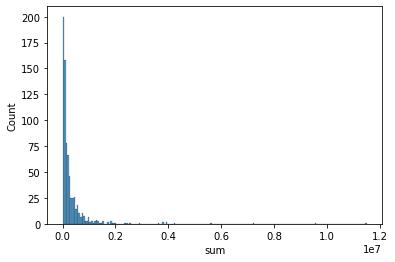

In [91]:
sns.histplot(g_pp1_s['sum'])

<AxesSubplot:xlabel='sum', ylabel='Count'>

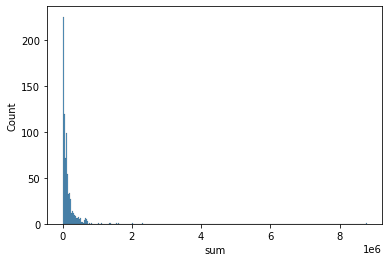

In [92]:
sns.histplot(g_pp0_s['sum'])

<AxesSubplot:xlabel='sum', ylabel='Count'>

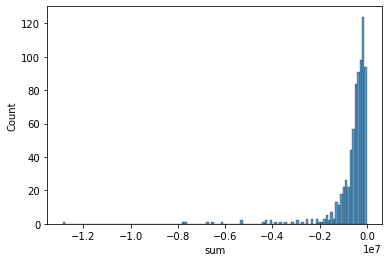

In [93]:
sns.histplot(g_p_1_s['sum'])

<AxesSubplot:xlabel='sum', ylabel='Count'>

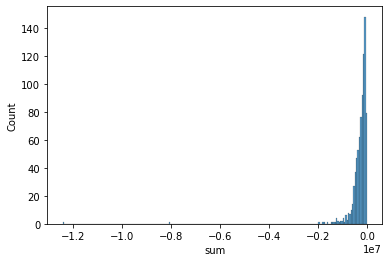

In [94]:
sns.histplot(g_1_s['sum'])

У каждой группы есть выбросы, которые можно рассмотреть